In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# [Problem 1] Feature selection for practice

In [2]:
data = pd.read_csv("train.csv")
df = pd.concat([data["GrLivArea"], data["YearBuilt"], data["SalePrice"]], axis=1)
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [4]:
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

# [Problem 2] Estimation and evaluation by linear regression

In [6]:
model = {"GrLivArea": {}, "YearBuilt": {}}
prediction = {"GrLivArea": {}, "YearBuilt": {}}
mse = {"GrLivArea": {}, "YearBuilt": {}}
x0 = df.loc[:, ["GrLivArea"]]
x1 = df.loc[:, ["YearBuilt"]]
y = df.loc[:, ["SalePrice"]]

x0_train, x0_test, y_train, y_test = train_test_split(x0, y, test_size=0.1, random_state=44)
x0_train_trans = StandardScaler().fit_transform(x0_train)
x0_test_trans = StandardScaler().fit_transform(x0_test)

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.1, random_state=44)
x1_train_trans = StandardScaler().fit_transform(x1_train)
x1_test_trans = StandardScaler().fit_transform(x1_test)

In [20]:
def train_and_predict(name = "LinearRegression", feature = "GrLivArea", verbose=False, graph=False):
    if feature == "GrLivArea":
        x_train = x0_train_trans
        x_test = x0_test_trans
    else:
        x_train = x1_train_trans
        x_test = x1_test_trans
        
    if name == "LinearRegression":
        model[feature][name] = LinearRegression().fit(x_train, y_train)
    elif name == "SVC":
        model[feature][name] = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, np.ravel(y_train))
    elif name == "DecisionTree":
        model[feature][name] = DecisionTreeClassifier().fit(x_train, y_train)
    elif name == "RandomForest":
        model[feature][name]= RandomForestClassifier().fit(x_train, np.ravel(y_train))
    prediction[feature][name] = model[feature][name].predict(x_test)
    mse[feature][name] = mean_squared_error(y_true=y_test, y_pred=prediction[feature][name])
    if verbose:
        print("MSE on {} for {} model: {}".format(feature, name, mse[feature][name]))
    if graph:
        plt.clf()
        plt.scatter(x_test, y_test)
        plt.scatter(x_test, prediction[feature][name])
        plt.title("{} for {} model".format(feature, name))
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.legend(["y_test","y_predict"])
        plt.show()

$\textbf{Linear Regression}$

MSE on GrLivArea for LinearRegression model: 2587727088.803915


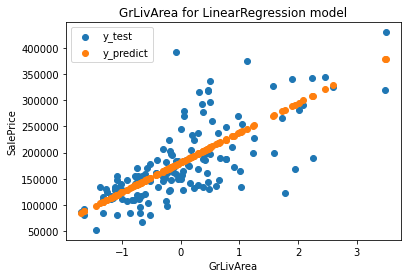

MSE on YearBuilt for LinearRegression model: 3817968196.634689


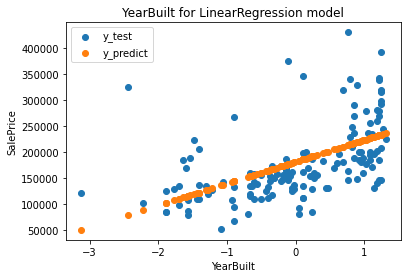

In [9]:
train_and_predict(name = "LinearRegression", feature = "GrLivArea", verbose=True, graph=True)
train_and_predict(name = "LinearRegression", feature = "YearBuilt", verbose=True, graph=True)

# [Problem 3] Comparison of methods

$\textbf{SVC}$

MSE on GrLivArea for SVC model: 3898626414.712329


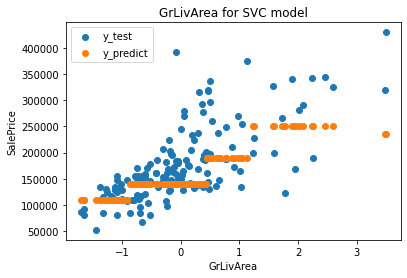

MSE on YearBuilt for SVC model: 3907005729.780822


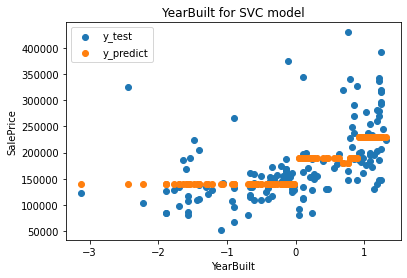

In [10]:
train_and_predict(name = "SVC", feature = "GrLivArea", verbose=True, graph=True)
train_and_predict(name = "SVC", feature = "YearBuilt", verbose=True, graph=True)

$\textbf{Decision tree}$

MSE on GrLivArea for DecisionTree model: 4734752113.554794


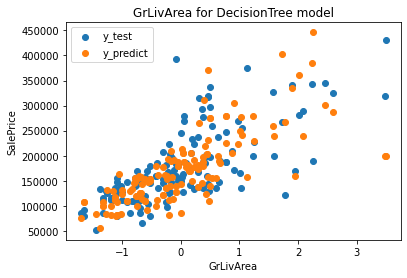

MSE on YearBuilt for DecisionTree model: 6919197420.746575


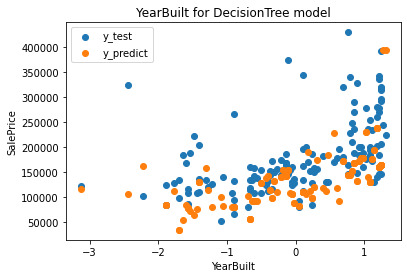

In [21]:
train_and_predict(name = "DecisionTree", feature = "GrLivArea", verbose=True, graph=True)
train_and_predict(name = "DecisionTree", feature = "YearBuilt", verbose=True, graph=True)

$\textbf{Random Forest}$

MSE on GrLivArea for RandomForest model: 5032280304.609589


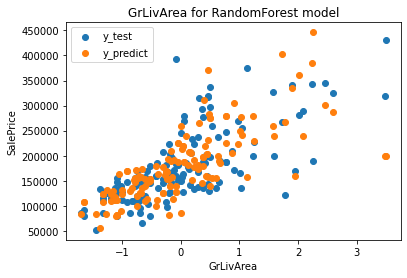

MSE on YearBuilt for RandomForest model: 9976250563.369864


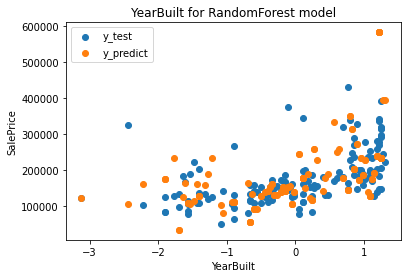

In [23]:
train_and_predict(name = "RandomForest", feature = "GrLivArea", verbose=True, graph=True)
train_and_predict(name = "RandomForest", feature = "YearBuilt", verbose=True, graph=True)

In [24]:
mse['GrLivArea']

{'LinearRegression': 2587727088.803915,
 'SVC': 3898626414.712329,
 'RandomForest': 5032280304.609589,
 'DecisionTree': 4734752113.554794}

In [30]:
pd.DataFrame(data=mse)

,GrLivArea,YearBuilt
LinearRegression,2.587727e+09,3.817968e+09
SVC,3.898626e+09,3.907006e+09
RandomForest,5.032280e+09,9.976251e+09
DecisionTree,4.734752e+09,6.919197e+09


>From the table above, for prediction based on either of the features, **Linear Regression** has the lowest MSE value, followed by **SVC**, which has the second best accuracy, and **Random Forest** has the worst measurement accuracy, while **Decision Tree** model is a little better.